## 3.1 Basic Statistics on CLERUS. 
In order to explore the dataset of CLERUS a series of basic statics are are performed in this [notebook](3_1_basic_stats_clerus.ipynb). 
It shows:
- How to load the data
- How to count the number of roles
- Number of ministers per period
- Average age
- Average age per period


In [1]:
# Load CLERUS data
import pyodbc
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Function to load all tables as panda dataframes from an access database
def export_access_to_dataframes(database_path):
    # Connection string for Access database
    conn_str = (
        r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
        r'DBQ=' + database_path + ';'
    )

    # Establish a connection to the Access database
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Get a list of all tables in the database
    tables = [row.table_name for row in cursor.tables(tableType='TABLE')]

    # Loop through the tables and load each into a DataFrame
    for table in tables:
        query = f'SELECT * FROM [{table}]'
        df = pd.read_sql(query, conn)
        globals()[f'tbl_{table}'] = df  # Create a global variable with the table name

    # Close the connection
    conn.close()

# Provided path to CLERUS access database (if needed there is also a .sql dump of the access database) 
clerus_db = '..\data\input\CLERUS_v1_DRC_07082024.accdb'

# load database tables as panda dataframes
export_access_to_dataframes(clerus_db)

C:\Users\Maurice de Kleijn\AppData\Local\Temp\ipykernel_21748\261895101.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Maurice de Kleijn\AppData\Local\Temp\ipykernel_21748\261895101.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Maurice de Kleijn\AppData\Local\Temp\ipykernel_21748\261895101.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Maurice de Kleijn\AppData\Local\Temp\ipykernel_21748\26

In [5]:
# Panda settings for showing data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# with the data available as panda dataframes all kind of descriptive analysis methods are possible. Below just a couple of basic queries are provided.

# Counting the number of different roles in CLERUS_v1

role_counts = tbl_12_clerus_role['role_type'].value_counts()


In [7]:
print(role_counts)

role_type
predikant                              25944
emeritus_status                         2578
hoogleraar                               288
legerpredikant                           262
hulppredikant                            258
rector                                   148
schoolmeester                            139
garnizoenspredikant                      101
pastoor                                   94
conrector                                 76
ambassadepredikant                        76
predikant remonstrants                    66
pastoor-predikant                         61
vlootpredikant                            55
predikant Waals                           38
priester                                  36
preceptor                                 32
prediker                                  31
monnik                                    29
ziekentrooster                            27
adjunct-predikant                         26
predikant Engels                          21


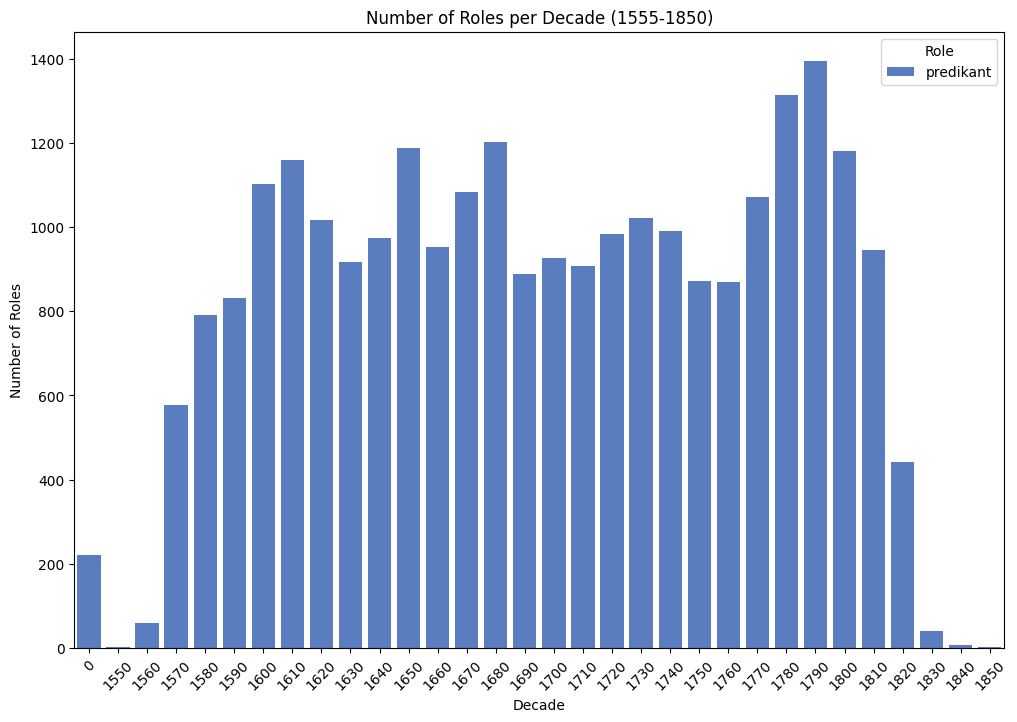

In [14]:
# Create a plot of all predikanten per decade (based on the start year)

# Filter out rows with no year value
tbl_12_clerus_role_excl_year = tbl_12_clerus_role.dropna(subset=['role_start_year'])
tbl_12_clerus_role_excl_year = tbl_12_clerus_role_excl_year[tbl_12_clerus_role_excl_year['role_type'] == 'predikant']
# Convert year to integer
tbl_12_clerus_role_excl_year['role_start_year'] = tbl_12_clerus_role_excl_year['role_start_year'].astype(int)

# Create a new column for the decade
tbl_12_clerus_role_excl_year['decade'] = (tbl_12_clerus_role_excl_year['role_start_year'] // 10) * 10

# Count the number of roles per decade
roles_per_decade = tbl_12_clerus_role_excl_year.groupby(['decade', 'role_type']).size().reset_index(name='count')

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='decade', y='count', hue='role_type', data=roles_per_decade, palette='muted')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.title('Number of Roles per Decade (1555-1850)')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.show()


In [3]:
# Average age of an individual in clerus_v1

# Calculate the age for each individual
# remove all 0 values
tbl_01_clerus_bio = tbl_01_clerus_bio.dropna(subset=['birth_year', 'death_year'])
tbl_01_clerus_bio = tbl_01_clerus_bio[(tbl_01_clerus_bio['birth_year'] != 0) & (tbl_01_clerus_bio['death_year'] != 0)]

tbl_01_clerus_bio['age'] = tbl_01_clerus_bio['death_year'] - tbl_01_clerus_bio['birth_year']

In [4]:
average_age = tbl_01_clerus_bio['age'].mean()
print("The average age is:", average_age)


The average age is: 60.3353115727003


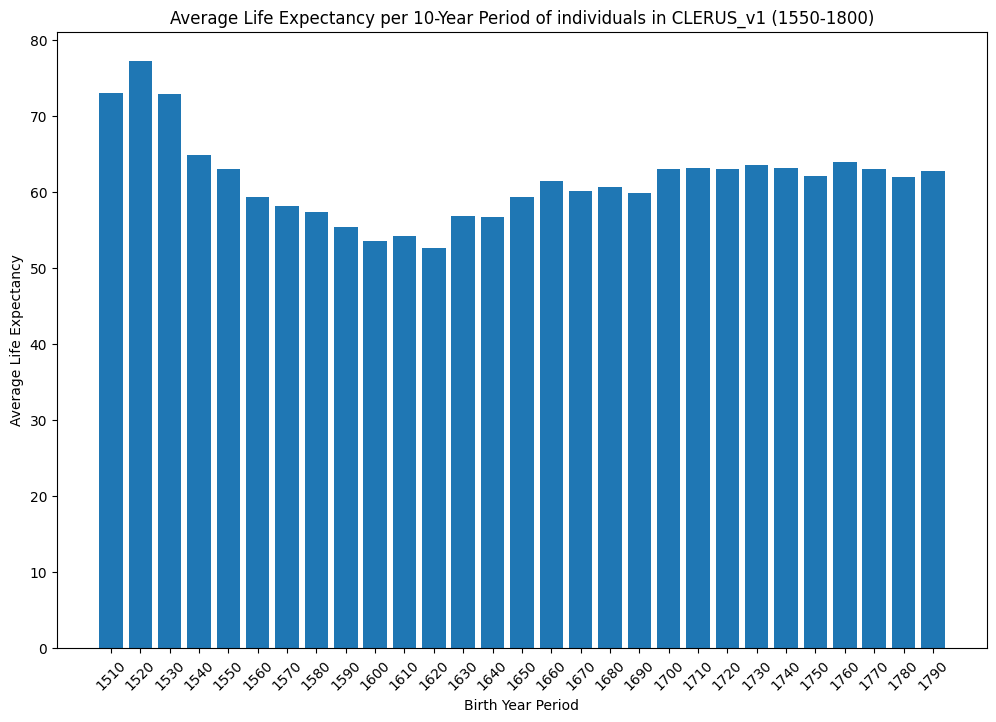

In [7]:
# Now we want to create a life expectancy per period and create a bar chart from it.

# Create a new column for the 10-year period
tbl_01_clerus_bio['period'] = (tbl_01_clerus_bio['birth_year'] // 10) * 10

# Group by the 10-year period and calculate the average life expectancy
life_expectancy_per_period = tbl_01_clerus_bio.groupby('period')['age'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
plt.bar(life_expectancy_per_period['period'], life_expectancy_per_period['age'], width=8)
plt.xlabel('Birth Year Period')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy per 10-Year Period of individuals in CLERUS_v1 (1550-1800)')
plt.xticks(life_expectancy_per_period['period'], rotation=45)
plt.show()